### Data processing
* Missing data
* Feature enginering

### EDA
* Visualization
* Phân tích mô tả dữ liệu
    * Univariate analysis
        * C
        * dsd 
    * 



### Missing data
* Xóa bỏ
    * Loại bỏ dòng bị trùng
    * Loại bỏ dòng bị rỗng
* Filling
    * Scaler
    * Mean
    * Median
    * Mode
    * Interpolate

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../data/dulieuxettuyendaihoc.csv',
                 header=0,delimiter=','
                 ,encoding='utf-8')
df = df[['GT','DT','KV','KT','M1',
         'M2','M3',
         'NGAYTHI','DINHHUONGNGHENGHIEP']]

df.info()
df.rename(columns={'NGAYTHI':'NT',
                   'DINHHUONGNGHENGHIEP':'NGHE'}, 
                   inplace=True)
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GT                   100 non-null    object 
 1   DT                   3 non-null      float64
 2   KV                   100 non-null    object 
 3   KT                   100 non-null    object 
 4   M1                   100 non-null    float64
 5   M2                   100 non-null    float64
 6   M3                   100 non-null    float64
 7   NGAYTHI              100 non-null    object 
 8   DINHHUONGNGHENGHIEP  100 non-null    object 
dtypes: float64(4), object(5)
memory usage: 7.2+ KB


,GT,DT,KV,KT,M1,M2,M3,NT,NGHE
0,F,NaN,2NT,A1,3.25,3.25,4.50,12/7/2018,No
1,M,NaN,1,C,6.00,4.00,3.50,12/7/2018,Yes
2,M,NaN,1,C,5.00,6.75,4.00,12/7/2018,No
3,M,NaN,1,D1,4.25,4.25,5.25,12/7/2018,No
4,M,NaN,2NT,A,4.25,4.50,5.00,12/7/2018,No


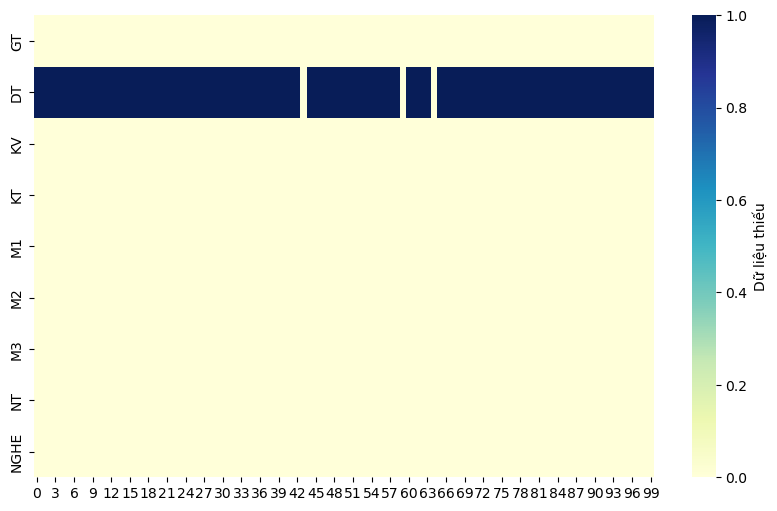

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap='YlGnBu',
            cbar_kws={'label':'Dữ liệu thiếu'})
plt.savefig('missingdata.png', dpi=100)
plt.show()

##### Fill dữ liệu trùng

In [ ]:
df['DT'].fillna('KINH', inplace=True)
df['M1'].fillna(df['M1'].mean(), inplace=True)
df['M2'].fillna(df['M2'].median(), inplace=True)
df['M3'].fillna(0, inplace=True)

##### Tạo cột TBM

In [4]:
df['TBM'] = (df['M1']+df['M2']+df['M3'])/3
df.head(5)

,GT,DT,KV,KT,M1,M2,M3,NT,NGHE,TBM
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333


##### Tạo cột XL

In [5]:
df.loc[df['TBM'] < 5.0, 'XL'] = 'FAIL'

df.loc[(df['TBM'] >= 5.0) & 
       (df['TBM'] < 7.0), 'XL'] = 'FAIR'

df.loc[(df['TBM'] >= 7.0) & 
       (df['TBM'] < 9.0), 'XL'] = 'GOOD'

df.loc[df['TBM'] >= 9.0, 'XL'] = 'EXCEL'
df.head(5)

,GT,DT,KV,KT,M1,M2,M3,NT,NGHE,TBM,XL
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667,FAIL
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000,FAIL
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000,FAIR
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333,FAIL
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333,FAIL


##### Tạo dictionary

In [6]:
dict_map = {
    'A1':'G1', 'C':'G3', 'D1': 'G3', 'A': 'G1', 'B': 'G2'
}
df['NHOM'] = df['KT'].map(dict_map)
df.head(5)

,GT,DT,KV,KT,M1,M2,M3,NT,NGHE,TBM,XL,NHOM
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667,FAIL,G1
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000,FAIL,G3
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000,FAIR,G3
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333,FAIL,G3
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333,FAIL,G1


##### Tạo cột điểm cộng `PLUS`

In [7]:
def fplus(x,y):
    if (x == 'G1' or x == 'G2') and (y >= 4.0):
        return 1.0
    else:
        return 0.0

df['PLUS'] = list(map(fplus,df['NHOM'],df['TBM']))
df.head(5)

,GT,DT,KV,KT,M1,M2,M3,NT,NGHE,TBM,XL,NHOM,PLUS
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667,FAIL,G1,0.0
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000,FAIL,G3,0.0
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000,FAIR,G3,0.0
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333,FAIL,G3,0.0
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333,FAIL,G1,1.0


### Bài tập về nhà
Tạo cột `MaxM` = gtri lớn nhất của (`M1`, `M2`, `M3`)

In [8]:
def maxM(array):
    return np.max(array)

df['MaxM'] = df[['M1','M2','M3']].apply(maxM, axis=1)
df.head(5)

,GT,DT,KV,KT,M1,M2,M3,NT,NGHE,TBM,XL,NHOM,PLUS,MaxM
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667,FAIL,G1,0.0,4.50
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000,FAIL,G3,0.0,6.00
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000,FAIR,G3,0.0,6.75
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333,FAIL,G3,0.0,5.25
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333,FAIL,G1,1.0,5.00


### Visualization

* Collumn
    * So sánh độ lớn
    * Ox, Oy
* Pie
    * Tỉ lệ phần trăm 
    * Toàn bộ 100%
    * Tỉ lệ % theo màu sắc
* Line
    * Sử dụng khi biểu diễn độ lớn dữ liệu có tính thứ tự   ***Theo thời gian***
    * Ox, Oy

Thống kê giới tính (cột cao hơn là giới tính nào)

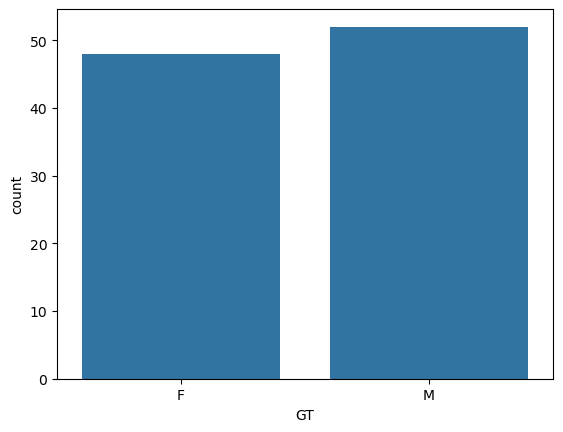

In [9]:
sns.countplot(x='GT', data=df)
plt.show()

Cột cao hơn khối thi nào

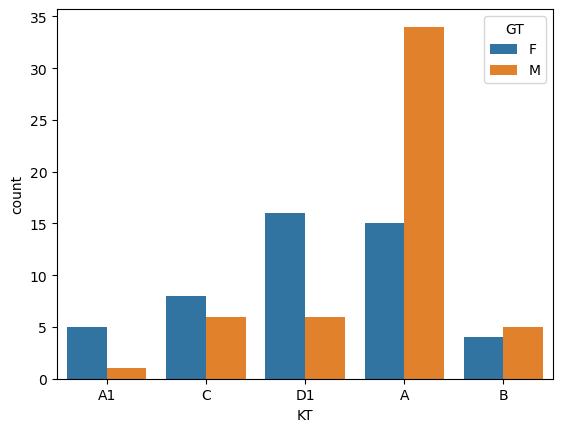

In [10]:
sns.countplot(x='KT', hue='GT',data=df)
plt.show()

Sinh viên tự làm tương tự cho các nhóm 
biến định tính: (`KV`,`KT`)
-->Hãy cho biết khối `A` có sinh viên khu vực nào đăng ký nhiều nhất

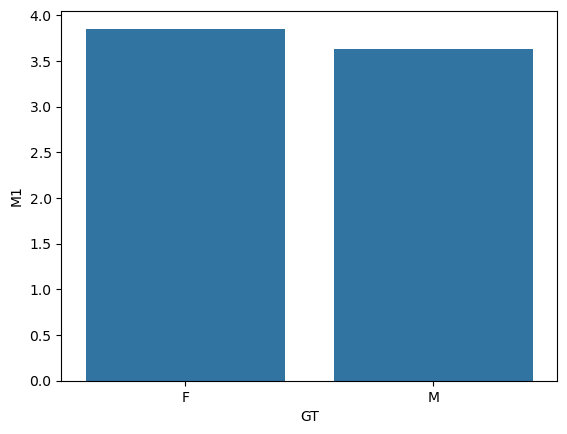

In [11]:
sns.barplot(x='GT', y='M1', data=df, errorbar=None)
plt.show()


Hãy so sánh trung bình điểm `M2` theo `NHOM`
-> Cho biết nhóm thi nào có điểm thi `M2` cao nhất

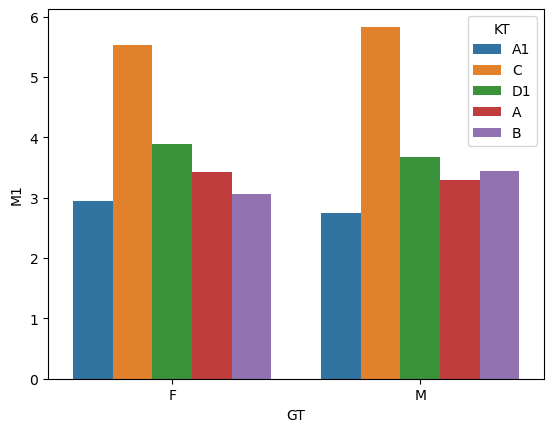

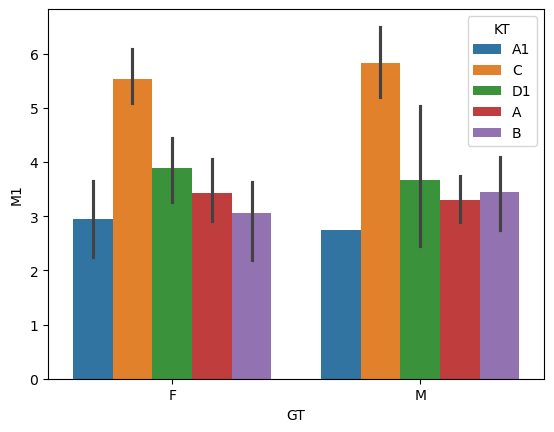

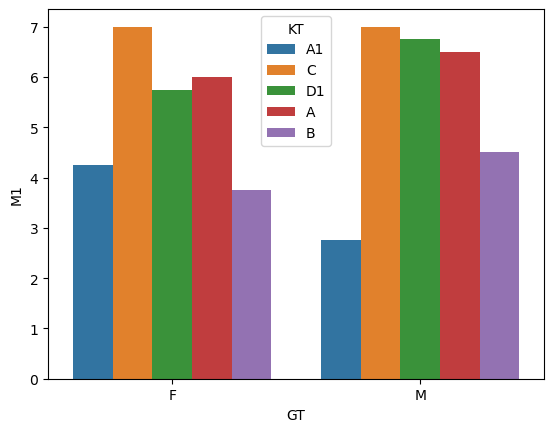

In [12]:
sns.barplot(x='GT', y='M1', hue='KT', data=df, errorbar=None)
plt.show()

sns.barplot(x='GT', y='M1', hue='KT', data=df)
plt.show()

sns.barplot(x='GT', y='M1', hue='KT', data=df, 
            errorbar=None, estimator=max)
plt.show()

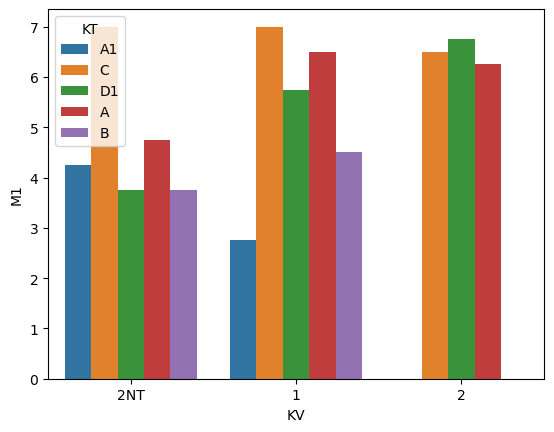

In [13]:
sns.barplot(x='KV', y='M1', hue='KT', 
            data=df, errorbar=None, estimator=np.max)
plt.show()

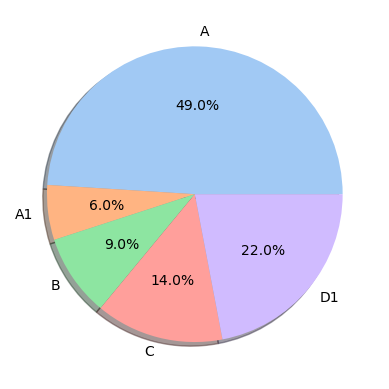

In [14]:
gb = df.groupby(['KT'])['KT'].agg(['count'])

labels = gb.index # labels = ['A','A1','B','C','D1']
data = list(gb['count']) # data= [49,6,9,14,22]

colors = sns.color_palette('pastel') # Tạo bảng màu

plt.pie(data, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)

plt.show()

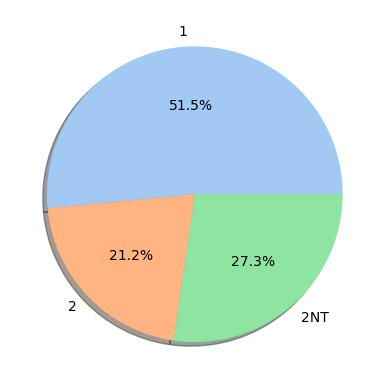

In [15]:
gb = df.groupby(['KV'])['PLUS'].agg(['sum'])

labels = gb.index
data = list(gb['sum'])

colors = sns.color_palette('pastel') # Tạo bảng màu

plt.pie(data, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)

plt.show()

### Phân tích dữ liệu định lượng
* Univariate Analysis
    * Đại lượng đo lường mức độ tập trung
    


### Phân tích đơn biến định lượng (Univariate analysis)

In [16]:
df['M1'].describe()

count    100.000000
mean       3.740000
std        1.424408
min        1.000000
25%        2.500000
50%        3.625000
75%        4.750000
max        7.000000
Name: M1, dtype: float64

In [17]:
df[['M1','M2','M3']].describe()

,M1,M2,M3
count,100.000000,100.000000,100.000000
mean,3.740000,4.255000,4.875000
std,1.424408,1.060053,1.041136
min,1.000000,1.500000,2.750000
25%,2.500000,3.500000,4.250000
50%,3.625000,4.125000,4.750000
75%,4.750000,4.750000,5.500000
max,7.000000,8.000000,8.000000


Trung bình điểm M1 theo giới tính nào tốt hơn ... ???

In [18]:
df.groupby('GT')['M1'].describe()

,count,mean,std,min,25%,50%,75%,max
GT,,,,,,,,
F,48.0,3.854167,1.348594,1.25,3.1875,3.75,5.0,7.0
M,52.0,3.634615,1.496288,1.00,2.4375,3.50,4.5,7.0


Câu hỏi đặt ra:
- Sinh viên có giới tính nam thì thi môn nào tốt hơn so với nữ
- Lưu ý: Chỉ dùng 2 dòng code để thể hiện kết quả

In [19]:
df.groupby('GT')['M2'].std()/df.groupby('GT')['M2'].mean()

GT
F    0.252518
M    0.240146
Name: M2, dtype: float64

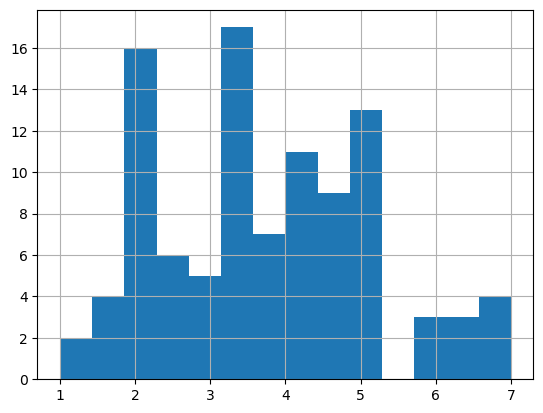

In [20]:
df['M1'].hist(bins=14)
plt.show()

Hãy cho biết phân phối của biến số nào gần với phân phối chuẩn hơn

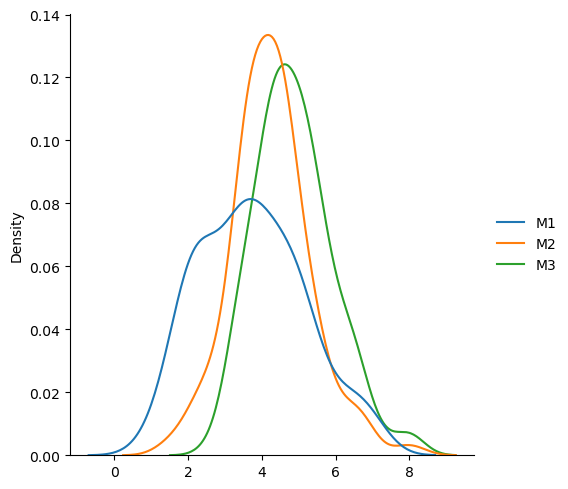

In [21]:
sns.displot(data = df[['M1','M2','M3']], kind='kde')
plt.show()

Độ xiên.
Lệnh trái càng đi về trái sx càng nhỏ.
- `Skew`> 0 : Positive (Lệch Phải) 
- `Skew`< 0 : Negative (Lệch Trái) 
- `Skew`= 0 : Không lệch (Phân phối chuẩn)

In [22]:
df[['M1','M2','M3']].skew()

M1    0.333221
M2    0.472551
M3    0.607063
dtype: float64

`kurtosis` Hình dáng độ nhọn
- `Excess` > 0 Thin (Xác xuất khoảng dữ liệu ở giữa là `cao` nhât)
- `Excess` < 0 Fat (Xác xuất khoảng dữ liệu ở giữa là `thấp` nhât)
- `Excess` = 0 Fit (Xác xuất khoảng dữ liệu ở giữa là phân phối chuẩn)

In [23]:
df[['M1','M2','M3']].kurtosis()
# Hãy cho biết dạng phân phối nào là thin, fat và fit

M1   -0.517004
M2    1.372439
M3    0.442173
dtype: float64

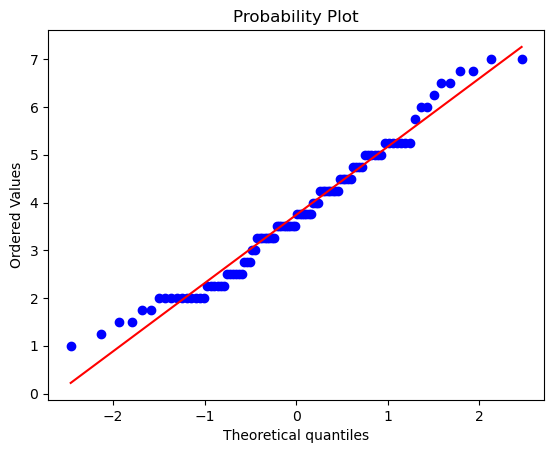

In [24]:
from scipy import stats
stats.probplot(df['M1'],plot=sns.mpl.pyplot)
plt.show()
# Hãy cho biết phân phối M1 có gần như phân phối chuẩn hay không


`IQR` = `|Q3 - Q1|`
- Lower bound = `Q1` - 1.5 * `IQR`
- Upper bound = `Q3` + 1.5 * `IQR`

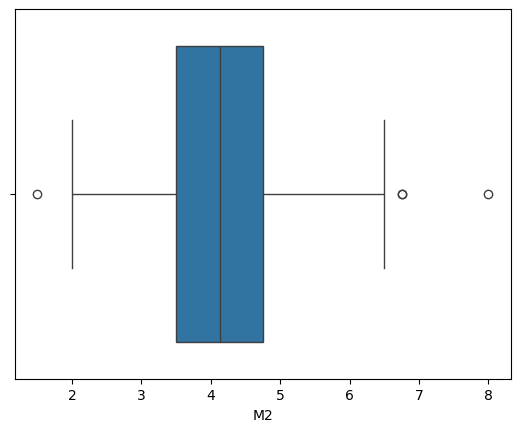

In [25]:
sns.boxplot(data=df['M2'], orient="h")
plt.show()
# Với điểm M2
# Hãy tính khoảng giá trị nghi ngờ bất thường
# Hãy tính khoảng giá trị được cho là bất thường
# Hãy tính xem có bao nhiêu sinh viên có điểm thi là bất thường


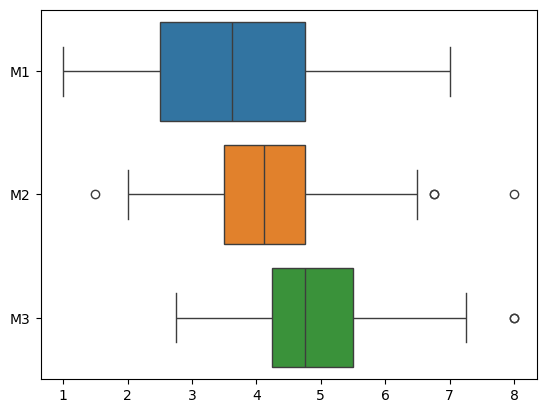

In [26]:
sns.boxplot(data=df[['M1','M2','M3']], orient='h')
plt.show()
# Câu hỏi: Hãy cho biết điểm số môn nào không xảy ra bất thường


Khối thi không dự báo được điểm do các biến bị gap

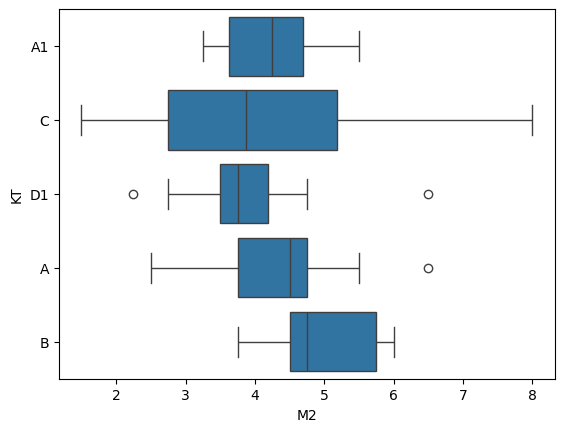

In [27]:
sns.boxplot(x='M2', y='KT',data=df, orient='h')
plt.show()
# Câu hỏi: Khối thi nào có lower bound trùng với tứ phân vị thứ 1 (tức là Q1)


### Multi variate analysis <br>
- Tương quan (Tác động quan hệ) giữa các biến số định lượng
    - `(X,Y) co-variance` < 0 Tương quan `nghịch`
    - `(X,Y) co-variance` > 0 Tương quan `Thuận`
    - `(X,Y) co-variance` = 0 Không tương quan

In [30]:
df[['M1','M2','M3']].cov()

,M1,M2,M3
M1,2.028939,0.053081,0.027778
M2,0.053081,1.123712,-0.101010
M3,0.027778,-0.101010,1.083965


- `|r|` < 0.5 `Thấp`
- `|r|` 0.5 - 0.65 `Khá`
- `|r|` 0.65 - 0.75 `Tốt`
- `|r|` 0.75 - 0.9 `Rất tốt`
- `|r|` > 0.9 `Hoàn hảo` <br>
<a href="" rel="some text"><img src="../data/download.jpg" alt="" /></a>

In [31]:
df[['M1','M2']].corr()

,M1,M2
M1,1.000000,0.035154
M2,0.035154,1.000000


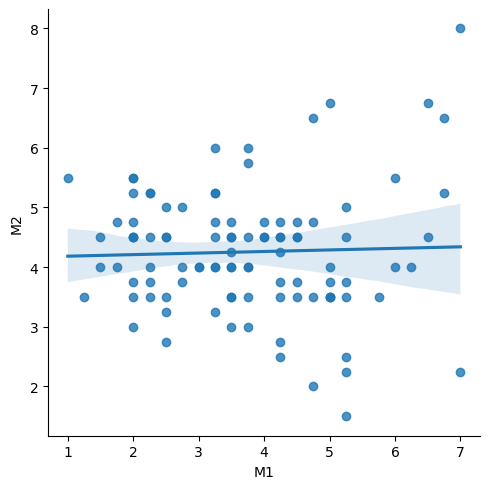

In [ ]:

sns.lmplot(data=df, x='M1', y='M2', fit_reg=True)
plt.show()